<a href="https://colab.research.google.com/github/tanvu10/ML_rework_algorithm/blob/main/Base_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np 


In [ ]:

class BaseNN:
    def __init__(self,X, y, num_iteration, layer_size):
        self.X = X
        if y.shape[0] != 1 :
            self.y = y.reshape(1,-1) #turn to row vector 
        self.num_iteration = num_iteration
        self.layer_size = layer_size #layer size: vector nodes in each layer
        self.layer_num = len(self.layer_size)
        self.parameter = {} #save in dic
        self.cost = []
        self.n = X.shape[0]

    def init_parameter(self):
        np.random.seed(0) #store random param
        for l in range(1,self.layer_num): #start from 1, ignore layer L
            # row: # of nodes of next layer, col: # of nodes of current layer
            self.parameter['W' + str(l)] = np.random.rand(self.layer_size[l], (self.layer_size[l-1]+1))

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    

    def gradient_sigmoid(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))


    def forward_feed(self, X):
        #short-term
        activation_node = {} 
        A = X.T
        #input layer 
        A = np.r_['0,2',np.ones(A.shape[1]),A]
        activation_node['A' + str(1)] = A
        for l in range(2, self.layer_num + 1):
            #loop from second layer to last layer
            A = self.parameter['W' + str(l-1)].dot(A)
            A = self.sigmoid(A)
            if l < self.layer_num:
                A = np.r_['0,2',np.ones(A.shape[1]),A] 
                activation_node['A' + str(l)] = A
            else:
                activation_node['A' +str(l)] = A

            
        #A is vector y hat
        return A, activation_node

    def backward_feed(self,y, X, activation_node):
        derri = {}
        
        #y: row vector

        #delta L (1,num_sammple)
        #a_(L-1) (#pre_node + 1, num_sample)

        '=> dJ/w(L-1) = delta_L*(a_(L-1))^T    '

        #for layer L :
        #dJ/w(L-1)  = (dJ/da_L)*(da_L/dz_L)*(d(z_L)/d(w(L-1))) = delta_L*(d(z_L)/d(w_(L-1))) = delta_L*a(L-1)
        #special case: delta_L = (y^ - y).*(da(L)/dz_L)
        delta_L = np.subtract(activation_node['A' + str(self.layer_num)],y) *   self.gradient_sigmoid(activation_node['A' + str(self.layer_num)])
        derri['DW' + str(self.layer_num-1)] = (1/self.n)*(delta_L).dot(activation_node['A' + str(self.layer_num-1)].T) 
        #send back delta from L:


        #send back from layer L = weight(L-1)*delta_L
        send_prev_delta_L = self.parameter['W'+ str(self.layer_num -1)].T.dot(delta_L)



        #reverse a loop from L-1 to 2: => update dW(L-2) => dW(1)
        for l in reversed(range(2,self.layer_num)):
            #this is delta L-1:, 
            #delta_L-1 = send_back from layer_L*g'(a(L-1))
            pre_delta_l = send_prev_delta_L*self.gradient_sigmoid(  activation_node['A' +str(l)]    )  
            pre_delta_l = pre_delta_l[1:, :] #remove first row before update derritive
            #dw(L-2) = delta(L-1)*a(L-2)
            derrivative = pre_delta_l.dot(activation_node['A' +str(l-1)].T) 
            derri['DW' + str(l-1)] = (1/self.n)*derrivative
            if l > 2:
                #update send back
                send_prev_delta_L = self.parameter['W'+ str(l-1)].T.dot(pre_delta_l)

        return derri

    def fit(self, X, y, learning_rate = 0.01):
        np.random.seed(1)

        self.init_parameter()
        
        #train step:
        for i in range(self.num_iteration):
            A, activation_node = self.forward_feed(X)
            # print(activation_node)
            p_derri = self.backward_feed(y, X, activation_node)
            self.cost.append(self.cost_cal(A, y))


            #update weight with gradient descent:
            for j in range(1,self.layer_num):
                #print(j)
                #print(self.parameter['W' +str(j)].shape)
                #print(p_derri['DW' + str(j)].shape)
                       
                self.parameter['W' +str(j)] = self.parameter['W' +str(j)]  - learning_rate*p_derri['DW' + str(j)]
    

    def cost_cal(self, predicted_val, y):
        return np.mean( -y*np.log(predicted_val) + -(1-y)*np.log(1-predicted_val) )
    

    def prediction(self, test_data):
        return self.forward_feed(test_data)[0]



In [ ]:

#review
# a = {}
# a['W' + str(1)] = np.random.rand(5,1)
# a['W' + str(2)] = np.random.rand(1,2)
# print(a)

# N = 3
# A = np.eye(N)
# np.r_['0,2',np.ones(A.shape[1]),A]              # add a row
# # for l in reversed(range(1,5)):
# #     print(l)



# A = np.array([[1, 2,3]])
# B = np.array([[1,2,3]])
# A.T.dot(B)
# A*B

# 1-A

In [ ]:
#implementation
#NN = BaseNN()
sample_data = np.random.rand(100, 4)
X = sample_data[:, :3]
# print(X)
y = (sample_data[:,3]).reshape(1, -1)
# print(y)

NN = BaseNN(X = X, y =y , num_iteration = 1000, layer_size = (3, 10,1))
print(NN.layer_num)
NN.fit(X,y)

3


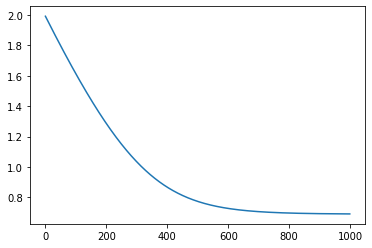

In [ ]:
import matplotlib.pyplot as plt
plt.plot(NN.cost)

In [ ]:
train_data = np.array([[1,1,1]])
prediction = NN.prediction(train_data)
print(prediction)

[[0.50437198]]
